In [1]:
import keras
from keras import layers
from keras.callbacks import EarlyStopping

from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

from math import floor

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

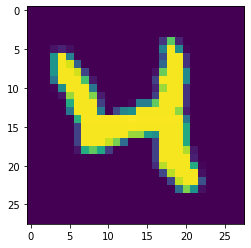

In [5]:
plt.imshow(x_train[20])

In [6]:
def model_build_test(no_of_layers, epochs=10):
    model = keras.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    for i in range(1, no_of_layers):
        if i == floor(no_of_layers/2):
            model.add(layers.Conv2D(16, 5, activation='relu'))
            model.add(layers.MaxPooling2D(2, strides=2))
        else:
            model.add(layers.Conv2D(16, 5, padding='same', activation='relu'))
            model.add(layers.MaxPooling2D(2, strides=1, padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.build()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # model.summary()
    
    history = model.fit(x_train, y_train, epochs=epochs, callbacks=[keras.callbacks.EarlyStopping(monitor='loss', patience=3)], verbose=0)
    acc = model.evaluate(x_test, y_test, verbose=0)[1]

    return acc, len(history.history['loss'])

In [13]:
for i in [0, 1, 2, 5, 10, 30, 50, 100]:
    acc, epochs = model_build_test(i)
    print(f'Layers {i}, Acc {acc}, Epochs {epochs}')

Layers 0, Acc 0.9815000295639038, Epochs 10
Layers 1, Acc 0.9793999791145325, Epochs 10
Layers 2, Acc 0.9866999983787537, Epochs 10
Layers 5, Acc 0.9876000285148621, Epochs 10
Layers 10, Acc 0.9851999878883362, Epochs 10
Layers 30, Acc 0.11349999904632568, Epochs 5
Layers 50, Acc 0.11349999904632568, Epochs 8
Layers 100, Acc 0.11349999904632568, Epochs 9



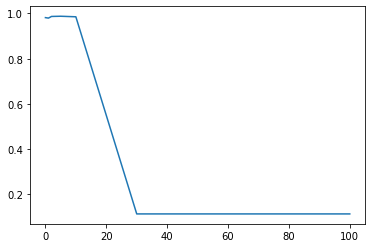

In [10]:
plt.plot([0, 1, 2, 5, 10, 30, 50, 100],
         [0.9815000295639038, 0.9793999791145325, 0.9866999983787537, 0.9876000285148621, 0.9851999878883362, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568])